![Dask_presentation_delayed ><](Dask_presentation_delayed.png)

# Delayed

In [1]:
import numpy as np
import time
from dask import delayed

In [2]:
def inc(x):          ### Increment x by 1
    return x + 1

def custom_op(x):    ### Custom operation 
    return 2*x**2

def add(x, y):       ### Add x and y
    return x + y

In [3]:
a_ = delayed(inc)(1) ## delayed(func)(*args)
a_

Delayed('inc-dd91f718-a9ca-444e-8d1a-301ed4f89484')

In [4]:
a_.compute()

2

In [5]:
data = np.arange(0,10,1)

In [6]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
a = [ delayed(inc)(x) for x in data ]    ### Form : delayed(func)(*arg)

In [8]:
b = [ delayed(custom_op)(x) for x in data ]

In [11]:
output = [ delayed(add)(i, j) for i,j in zip(a,b) ]

total = delayed(sum)(output)
total 

Delayed('sum-897d06f1-712d-4935-8867-8077c2d62607')

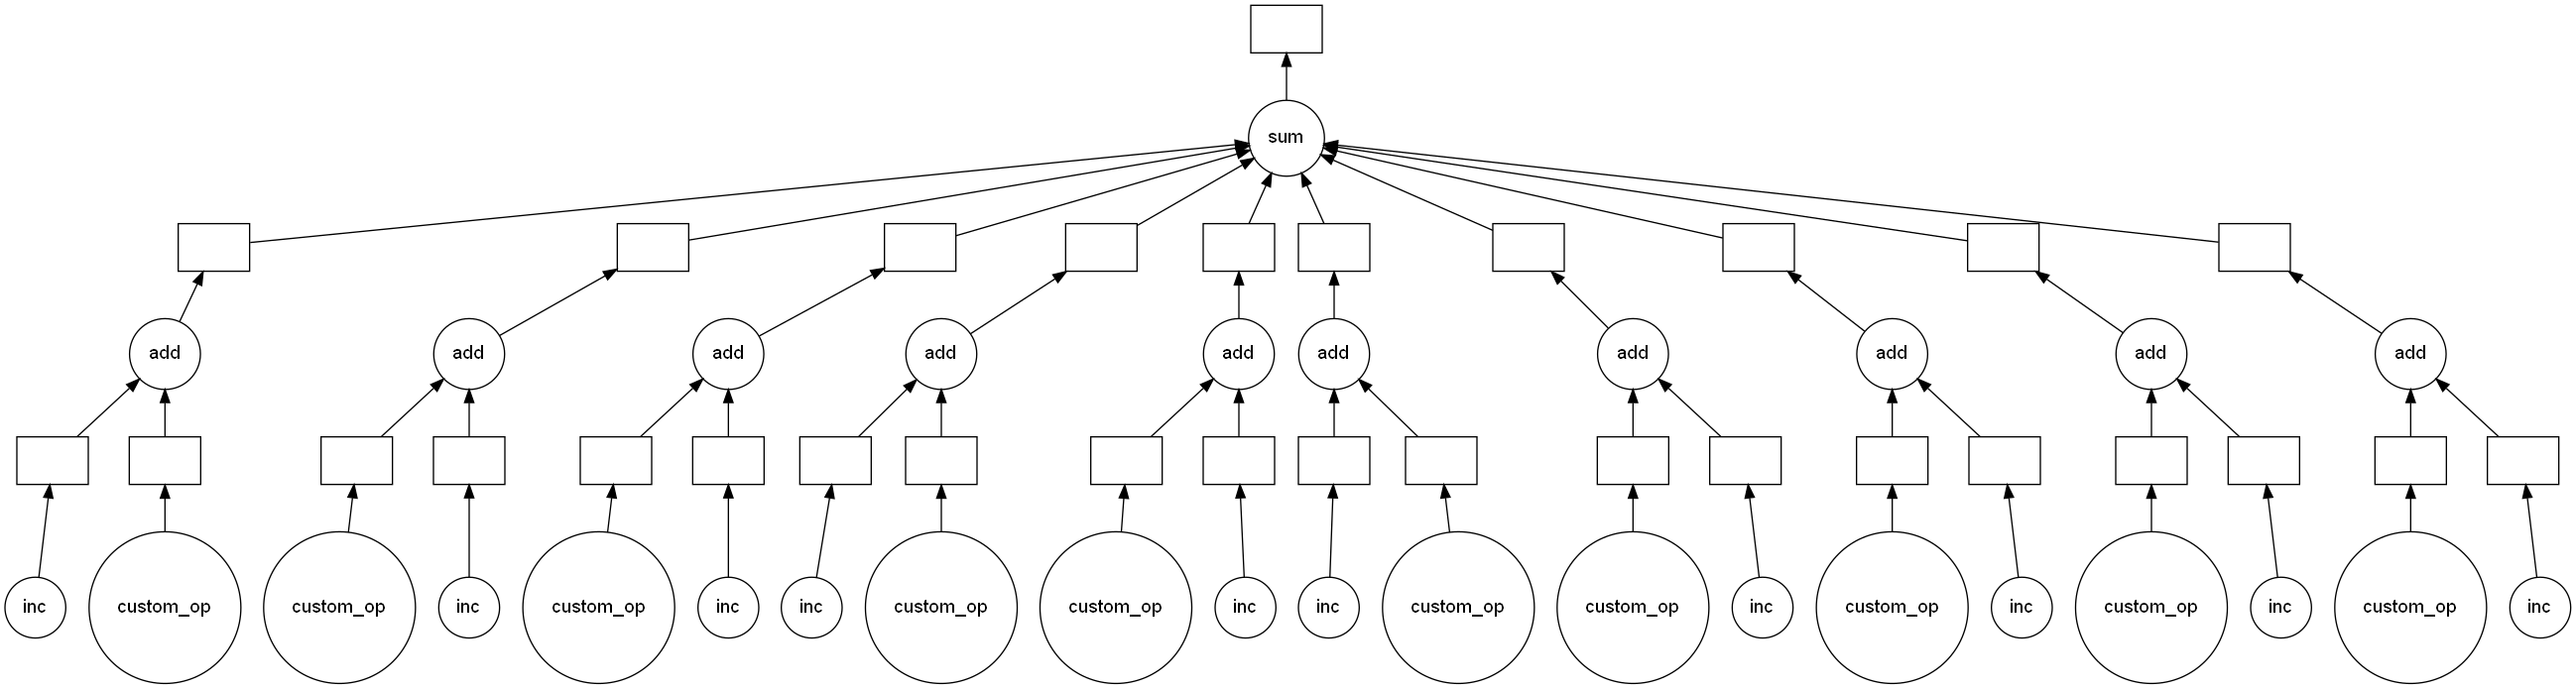

In [12]:
total.visualize()

In [13]:
total.compute()

625

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Latin Modern Roman",
})

## Delayed as decorator

In [15]:
@delayed
def inc(x):
    return x + 1

@delayed
def custom_op(x):
    return 2*x**2

@delayed
def add(x, y):
    return x + y

In [16]:
a = [inc(x) for x in data]
b = [custom_op(x) for x in data]
output = [add(i, j) for i,j in zip(a,b)]

output

[Delayed('add-70692b61-0caa-487f-a929-0943145c9ab0'),
 Delayed('add-6030ae09-8c98-42e0-8045-28681aaf9b69'),
 Delayed('add-7013b211-374d-4ac7-b234-9eea982c1dcb'),
 Delayed('add-809da006-7b43-4927-a38f-65e56a0fc4af'),
 Delayed('add-f4857878-3a95-44a6-895e-d5c575290b7b'),
 Delayed('add-886766c9-5d93-41c5-b086-3248b6e07964'),
 Delayed('add-eaf3669c-81b0-4e2d-a66d-572d41adc12e'),
 Delayed('add-ea27f8c4-3cda-42ed-a3e3-d25759092b37'),
 Delayed('add-f699f861-d344-42a8-a445-bcc2697804f3'),
 Delayed('add-e8409e21-4678-4fb1-81d0-a1ac19eb3045')]

In [17]:
@delayed
def plot(a,b,savefile=None):
    
    fig,ax = plt.subplots(figsize=(5,2) )
    ax.scatter(a, b, marker='o', facecolor='0.8', edgecolor='0.2')   #### Scatter a(b)
    ax.set_xlabel(r'$x+1$')
    ax.set_ylabel(r'$2x^{2}$')
    ax.spines[['right','top']].set_visible(False)
    fig.tight_layout()
    if savefile != None:
        fig.savefig(savefile,transparent=True)
        return
    return fig

In [18]:
fig = plot(a,b)

In [19]:
fig

Delayed('plot-96283039-3726-4052-95e1-66ffe41acf9b')

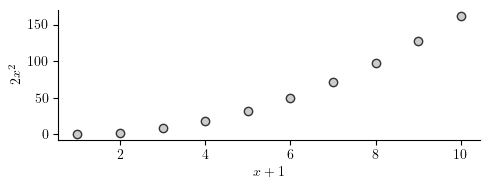

In [20]:
fig = fig.compute()

# ![Dask_presentation_future><](Dask_presentation_future.png)

# Futures

In [21]:
from dask.distributed import Client, LocalCluster
import time

cluster = LocalCluster()
client = Client(cluster) # Same as client=Client()

In [23]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 7.71 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57035,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 7.71 GiB
Comm: tcp://127.0.0.1:57072,Total threads: 2
Dashboard: http://127.0.0.1:57073/status,Memory: 1.93 GiB
Nanny: tcp://127.0.0.1:57038,


In [25]:
def create(x):                         #### Create some dummy data
    return np.arange(100) + x

def process(x,y):                      #### Do something
    return 2*x + y

def save(x):                           #### Save
    time.sleep(0.6)
    return 'Saved'

In [26]:
in1 = np.arange(0,50)
in2 = np.arange(50,100)
futures = []

for i,j in zip(in1, in2):
    
    dummy_x = client.submit(create, i)         ### Form : client.submit(func, *args)
    dummy_y = client.submit(create, j)
    
    proc = client.submit(process, dummy_x, dummy_y)
    end = client.submit(save, proc)
    futures.append(end)

futures

[<Future: pending, key: save-035367827fa70bf3271f765ccf9abe75>,
 <Future: pending, key: save-9fd6d2c6355e63c1efec074feaf3b8d7>,
 <Future: pending, key: save-13c23ce4d055767eabf341538db86134>,
 <Future: pending, key: save-0355956eeddae2388a62dd8ef071ef78>,
 <Future: pending, key: save-d19588b755d66aa62bbc05b93efe8e5c>,
 <Future: pending, key: save-8cad95862a6308823c5f33bef4021a80>,
 <Future: pending, key: save-04e1673fd49c3fe590bf18b0408bbb89>,
 <Future: pending, key: save-9c44ac00173551e82e014d2cd68d09eb>,
 <Future: pending, key: save-b1dcb3bab2610b92ebeb6036a968ebe4>,
 <Future: pending, key: save-6eedc2832f85947493c5cc88ba0b7ec0>,
 <Future: pending, key: save-4c313242d61c319e44824f4c23f755d4>,
 <Future: pending, key: save-b8ff1149c0f8c6df950c48e120e6de9f>,
 <Future: pending, key: save-bf01423d4c3027dc268b276813cc90a3>,
 <Future: pending, key: save-9157146fff72c2d050cfc8284780b650>,
 <Future: pending, key: save-4234327f347986d7cad90ed68fda877d>,
 <Future: pending, key: save-f5646b7721a

In [32]:
futures[0].status

'finished'

In [33]:
#result = [future.result() for future in futures]
results = client.gather(futures) ### faster

In [34]:
results[:5]

['Saved', 'Saved', 'Saved', 'Saved', 'Saved']

# Futures everywhere

### Futures + delayed

In [ ]:
@delayed
def inc(x):
    return x + 1

@delayed
def custom_op(x):
    return 2*x**2

@delayed
def add(x, y):
    return x + y

In [35]:
a = [inc(x) for x in data]
b = [custom_op(x) for x in data]
output = [add(i, j) for i,j in zip(a,b)]

output

[Delayed('add-5519334d-6a60-4ff6-9865-39949f6dd0cc'),
 Delayed('add-73e7fe62-51ad-4c96-ae4f-4ea45ff02cca'),
 Delayed('add-a54e49e6-2e03-4a27-94db-6b3f7bad2207'),
 Delayed('add-760d98a7-88f0-4db3-8a53-91d92ff59a14'),
 Delayed('add-64b9ecd0-299d-4cfd-85b0-c9637528bf7a'),
 Delayed('add-f1afbaf8-ef71-4c70-b441-243a1cb8d4ae'),
 Delayed('add-0ace1fa3-c3b2-4766-a85b-744722b430a2'),
 Delayed('add-f84a691f-e6a9-477c-a7ac-f65c21748f6a'),
 Delayed('add-ebab7eb7-7fe2-4306-9068-bd88a8480f14'),
 Delayed('add-ffa1a53a-0bd0-4eaf-9093-fe23c07de197')]

In [36]:
future_delayed = client.compute(output)

In [37]:
future_delayed

[<Future: finished, type: numpy.int32, key: add-5519334d-6a60-4ff6-9865-39949f6dd0cc>,
 <Future: finished, type: numpy.int32, key: add-73e7fe62-51ad-4c96-ae4f-4ea45ff02cca>,
 <Future: finished, type: numpy.int32, key: add-a54e49e6-2e03-4a27-94db-6b3f7bad2207>,
 <Future: finished, type: numpy.int32, key: add-760d98a7-88f0-4db3-8a53-91d92ff59a14>,
 <Future: finished, type: numpy.int32, key: add-64b9ecd0-299d-4cfd-85b0-c9637528bf7a>,
 <Future: finished, type: numpy.int32, key: add-f1afbaf8-ef71-4c70-b441-243a1cb8d4ae>,
 <Future: finished, type: numpy.int32, key: add-0ace1fa3-c3b2-4766-a85b-744722b430a2>,
 <Future: finished, type: numpy.int32, key: add-f84a691f-e6a9-477c-a7ac-f65c21748f6a>,
 <Future: finished, type: numpy.int32, key: add-ebab7eb7-7fe2-4306-9068-bd88a8480f14>,
 <Future: finished, type: numpy.int32, key: add-ffa1a53a-0bd0-4eaf-9093-fe23c07de197>]

### Futures + dask arrays

In [38]:
size=1000
import dask.array as da
vx = da.random.normal(size=(size, size, size))
vy = da.random.normal(size=(size, size, size))
vz = da.random.normal(size=(size, size, size))

In [39]:
V = da.sqrt(da.mean(vx)**2 + da.mean(vy)**2 + da.mean(vz)**2)

In [40]:
future_v = client.compute(V)

In [44]:
future_v.result()

5.772750137674384e-05

2023-06-27 15:31:54,315 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57064', name: 2, status: running, memory: 28, processing: 0>
2023-06-27 15:31:54,365 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57072', name: 0, status: running, memory: 28, processing: 2>
2023-06-27 15:31:54,424 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:57064'.
2023-06-27 15:31:54,426 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:57072'.
2023-06-27 15:31:54,749 - distributed.nanny - WARNING - Restarting worker
2023-06-27 15:31:54,827 - distributed.nanny - WARNING - Restarting worker
2023-07-05 15:06:11,553 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57069', name: 3, status: running, 

In [43]:
future_v

<Future: finished, type: numpy.float64, key: finalize-caa35207def27777c698d3c419a149f2>

In [ ]:
data_2d = np.random.uniform(size=(10,100))
data_2d.shape

In [ ]:
def compute_single(data):

    a = [inc(x) for x in data]
    b = [custom_op(x) for x in data]
    output = [add(i, j) for i,j in zip(a,b)]
    
    return delayed(sum)(output)

In [ ]:
stored_single = compute_single(data_2d[0])
stored_single

In [ ]:
future = client.compute(stored_single)
future

In [ ]:
stored_multi = [compute_single(data=d) for d in data_2d ]

In [ ]:
stored_multi

In [ ]:
future = client.compute(stored_multi)

In [ ]:
results = client.gather(future);

In [ ]:
# futures = [client.compute(s) for s in stored_multi]
# results = client.gather(futures);

In [ ]:
client.close()
cluster.close()